In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import sys, os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/0_projects/MBTI_twitter/mbti_1.csv')
print(df.head())

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


In [ ]:
import string
import re

def clean_text(text):
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)
    words = str(text).split()
    words = [i.lower() + " " for i in words]
    words = [i for i in words if not "http" in i]
    words = " ".join(words)
    words = words.translate(words.maketrans('', '', string.punctuation))
    return words

In [ ]:
df['cleaned_text'] = df['posts'].apply(clean_text)

types = np.unique(df.type.values)
def get_type_index(string):
    return list(types).index(string)

df['type_index'] = df['type'].apply(get_type_index)


In [ ]:
counts = pd.DataFrame(df_explode.Type.value_counts(normalize=True)).reset_index()
counts.columns = ['Type', 'pct']
ax = sns.barplot(x="Type",y='pct',data=counts)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)
X_train = train.cleaned_text
y_train = train.type_index

X_test = test.cleaned_text
y_test = test.type_index

In [ ]:
pip install ktrain

     |████████████████████████████████| 25.3MB 1.6MB/s 
     |████████████████████████████████| 983kB 50.7MB/s 
     |████████████████████████████████| 266kB 58.0MB/s 
     |████████████████████████████████| 1.3MB 59.1MB/s 
     |████████████████████████████████| 1.1MB 61.5MB/s 
     |████████████████████████████████| 471kB 56.8MB/s 
     |████████████████████████████████| 2.9MB 41.7MB/s 
     |████████████████████████████████| 890kB 49.6MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.2-cp36-none-any.whl size=25276306 sha256=fef49daa45925be54127c0cc9285b8cda1120d9af54146fad1d1bebaf1a0738b
  Stored in directory: /root/.cache/pip/wheels/fe/56/00/25444c352cc843e5c5daea0e9517a192878ae22c2c6b5f4573
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=b5c017ddb9b136617a145b6007990a2ac469227b4503ac43e716ed1deb575c33
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
  Created wheel for syn

In [ ]:
import ktrain
from ktrain import text

In [ ]:
categories = df.type.unique().tolist()

In [ ]:
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name, maxlen=512, class_names=categories)



In [ ]:
train_data = trans.preprocess_train(X_train.values, y_train.values)
test_data = trans.preprocess_test(X_test.values, y_test.values)


preprocessing train...
language: en
train sequence lengths:
	mean : 1259
	95percentile : 1680
	99percentile : 1780


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 1268
	95percentile : 1681
	99percentile : 1764


In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=16)


simulating training for different learning rates... this may take a few moments...
Epoch 1/10
406/406 [==============================] - 126s 309ms/step - loss: 2.6932 - accuracy: 0.1458
Epoch 2/10
406/406 [==============================] - 127s 313ms/step - loss: 2.4260 - accuracy: 0.2066
Epoch 3/10
406/406 [==============================] - 127s 313ms/step - loss: 2.1191 - accuracy: 0.3277
Epoch 4/10
406/406 [==============================] - 127s 312ms/step - loss: 1.5774 - accuracy: 0.5451
Epoch 5/10
406/406 [==============================] - 127s 312ms/step - loss: 2.0979 - accuracy: 0.3120
Epoch 6/10
406/406 [==============================] - 127s 313ms/step - loss: 2.3408 - accuracy: 0.1977
Epoch 7/10
406/406 [==============================] - 126s 311ms/step - loss: 2.3790 - accuracy: 0.1874
Epoch 8/10
406/406 [==============================] - 125s 307ms/step - loss: 2.3096 - accuracy: 0.2072
Epoch 9/10
406/406 [==============================] - 125s 307ms/step - loss: 2.4196 

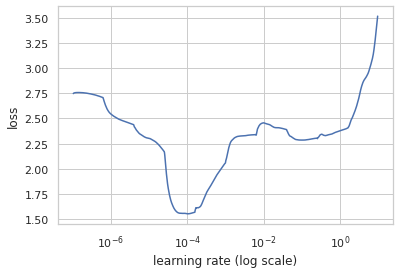

In [ ]:
#learner.lr_find(show_plot=True, max_epochs=10)

In [ ]:
learner.fit_onecycle(1e-4, epochs=10)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/10
407/407 [==============================] - 239s 587ms/step - loss: 2.1014 - accuracy: 0.3508 - val_loss: 1.6009 - val_accuracy: 0.5196
Epoch 2/10
407/407 [==============================] - 237s 582ms/step - loss: 1.4424 - accuracy: 0.5884 - val_loss: 1.3757 - val_accuracy: 0.5920
Epoch 3/10
407/407 [==============================] - 237s 583ms/step - loss: 1.2035 - accuracy: 0.6591 - val_loss: 1.3679 - val_accuracy: 0.5943
Epoch 4/10
407/407 [==============================] - 237s 583ms/step - loss: 1.0181 - accuracy: 0.7106 - val_loss: 1.4704 - val_accuracy: 0.5874
Epoch 5/10
407/407 [==============================] - 237s 583ms/step - loss: 0.8945 - accuracy: 0.7415 - val_loss: 1.4485 - val_accuracy: 0.6040
Epoch 6/10
407/407 [==============================] - 237s 583ms/step - loss: 0.6804 - accuracy: 0.8068 - val_loss: 1.5404 - val_accuracy: 0.5943
Epoch 7/10
407/407 [==============================] - 237s 5

In [ ]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

        INFJ       0.42      0.37      0.39        49
        ENTP       0.57      0.57      0.57       166
        INTP       0.48      0.53      0.50        60
        INTJ       0.56      0.56      0.56       171
        ENTJ       0.60      0.50      0.55        12
        ENFJ       0.33      0.07      0.12        14
        INFP       0.67      0.67      0.67         9
        ENFP       0.64      0.38      0.47        24
        ISFP       0.58      0.64      0.61       364
        ISTP       0.69      0.65      0.67       464
        ISFJ       0.58      0.63      0.60       262
        ISTJ       0.63      0.57      0.60       348
        ESTP       0.58      0.47      0.52        40
        ESFP       0.45      0.54      0.49        61
        ESTJ       0.49      0.59      0.54        51
        ESFJ       0.55      0.64      0.59        74

    accuracy                           0.59      2169
   macro avg       0.55   

array([[ 18,   5,   1,   1,   0,   0,   0,   0,  11,   4,   3,   3,   1,
          0,   1,   1],
       [  4,  94,   5,   7,   0,   0,   0,   1,  14,  11,  12,   8,   2,
          4,   2,   2],
       [  0,   3,  32,   4,   0,   0,   0,   2,   4,   3,   5,   3,   0,
          2,   1,   1],
       [  2,  11,   8,  95,   0,   0,   1,   0,  10,   6,  14,  15,   1,
          3,   2,   3],
       [  0,   0,   0,   0,   6,   0,   0,   0,   0,   4,   0,   0,   0,
          2,   0,   0],
       [  0,   2,   1,   3,   1,   1,   0,   0,   1,   2,   0,   0,   0,
          2,   0,   1],
       [  0,   0,   0,   0,   0,   0,   6,   0,   1,   0,   0,   0,   0,
          0,   1,   1],
       [  0,   3,   1,   3,   1,   0,   0,   9,   3,   0,   1,   1,   0,
          0,   0,   2],
       [  8,   8,   4,  10,   0,   0,   0,   0, 232,  53,  20,  15,   2,
          3,   1,   8],
       [  8,  19,   4,  10,   0,   1,   0,   0,  51, 303,  21,  22,   2,
         13,   6,   4],
       [  2,  10,   4,   8,   

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)


In [ ]:
predictor

In [ ]:
test_text = '''
Birthday Collection Shoot. I loved this day! Slide to see this purple eye !!! Fun fact... my room growing up was all lavender and purple has always been such a pretty color to me that’s why I wanted my birthday collection to have the prettiest purple palette! 
@kkwbeauty
It was snowing in Calabasas for my holiday collection! Check it out now http://kkwb.co/crystallized
I’m so excited to announce our 
@SKIMS
 Global launch today at 
@netaporter
! The SKIMS pieces you love are now available online to our worldwide community at http://NET-A-PORTER.COM.
Hey guys Brandon’s case is even more urgent, he’s actually scheduled to be executed on December 10th not the 12th

'''
test_text = clean_text(test_text)
for cat, prob in zip(categories, predictor.predict_proba(test_text)):
  print(cat,prob*100)
print(predictor.predict(test_text))

INFJ 5.816403776407242
ENTP 1.5939461067318916
INTP 0.09746489813551307
INTJ 0.017082886188291013
ENTJ 0.07198021048679948
ENFJ 0.31751813367009163
INFP 0.8377776481211185
ENFP 0.04664947045966983
ISFP 0.8015098981559277
ISTP 52.48972177505493
ISFJ 0.07355317939072847
ISTJ 0.06807767786085606
ESTP 9.150468558073044
ESFP 28.161242604255676
ESTJ 0.2584570785984397
ESFJ 0.1981391804292798
ISTP


In [ ]:
predictor.save('/content/gdrive/MyDrive/0_projects/MBTI_twitter/bert_model/models')

In [ ]:
model = ktrain.load_predictor('/content/gdrive/MyDrive/0_projects/MBTI_twitter/bert_model/models')

In [ ]:
test_text = clean_text(test_text)
for cat, prob in zip(categories, model.predict_proba(test_text)):
  print(cat,prob*100)
print(model.predict(test_text))

INFJ 5.816403776407242
ENTP 1.5939461067318916
INTP 0.09746489813551307
INTJ 0.017082886188291013
ENTJ 0.07198021048679948
ENFJ 0.31751813367009163
INFP 0.8377776481211185
ENFP 0.04664947045966983
ISFP 0.8015098981559277
ISTP 52.48972177505493
ISFJ 0.07355317939072847
ISTJ 0.06807767786085606
ESTP 9.150468558073044
ESFP 28.161242604255676
ESTJ 0.2584570785984397
ESFJ 0.1981391804292798
ISTP
